In [10]:
from sklearn.datasets import load_iris
import pandas as pd

In [6]:
li = load_iris()

In [7]:
li.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
print(li['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [13]:
df = pd.DataFrame(li['data'],columns=li['feature_names'])

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
li['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
X = df.iloc[:,:]
y = li['target']

In [22]:
from sklearn.cross_validation import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
import seaborn as sns

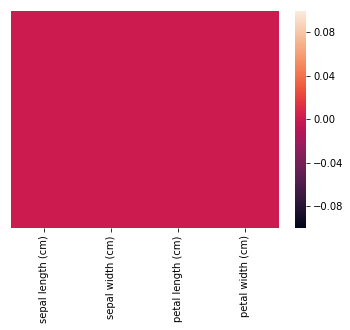

In [28]:
sns.heatmap(data = X_train.isnull(),yticklabels=False)

In [29]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

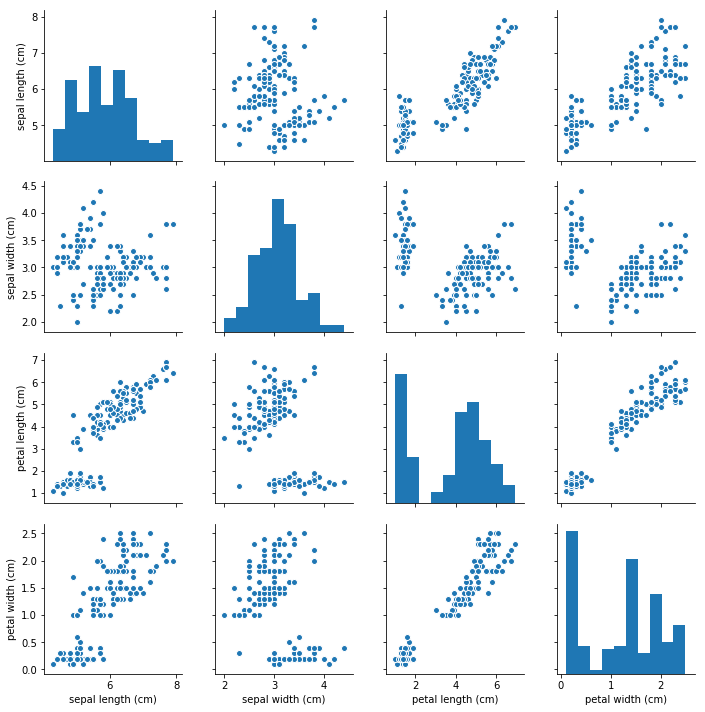

In [30]:
sns.pairplot(data = df)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)

In [55]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [56]:
y_pred = knn.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(y_test,y_pred)

In [59]:
print(cm)

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
cvs = cross_val_score(knn,X_train,y_train,cv=10)

In [62]:
print(cvs)

[ 0.85714286  0.91666667  0.75        1.          1.          1.          1.
  1.          1.          1.        ]


In [63]:
cvs.mean()

0.95238095238095233

In [64]:
cvs.std()

0.08196149751456433